In [9]:
#Import all the necessary packages and libraries required for our Data Analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
print('All packages and libraries have been installed ')

All packages and libraries have been installed 


In [69]:
#Importing a Dataset of used Cars 
#This Dataset will help us in our Price Estimation
path="imports-85.data" 
#Since the above dataset is a .csv file, we need to use read_csv() 
df=pd.read_csv(path, header = None)
# Display the dataframe df
df                  #Prints the entire data frame

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [11]:
#Display the first 8 rows of our dataframe  
df.head(8)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [12]:
headers=["Symbolling","Normalised-Loses","Make","Fuel-type","Aspiration","No. of doors","Body-Style","Drive-Wheels","Engine-Location","Wheel-Base","Length","Width","Height","Curb-Weight","Engine-type","No.of cylinders","Engine-size","Fuel-systems","Bore","Stroke","Compression-Ratio","Horse-power","Peak-rpm","City-mpg","Highway-mpg","Price"]

In [13]:
df.columns=headers
df.head(8)

,Symbolling,Normalised-Loses,Make,Fuel-type,Aspiration,No. of doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-size,Fuel-systems,Bore,Stroke,Compression-Ratio,Horse-power,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920


In [14]:
#Display the Statiscal summary of out dataframe such as count, mean , std,min,max, e.t.c...
df.describe()

,Symbolling,Wheel-Base,Length,Width,Height,Curb-Weight,Engine-size,Compression-Ratio,City-mpg,Highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [15]:
# First we need to replace ? (missing values) as 'NaN' 
df.replace("?", np.nan, inplace = True)
df.head()


,Symbolling,Normalised-Loses,Make,Fuel-type,Aspiration,No. of doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-size,Fuel-systems,Bore,Stroke,Compression-Ratio,Horse-power,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [16]:
#Now we need to replace NaN values of Normalised-Loses with its mean value
#Calculate the average value of the Normalised-Loses
avg_NL = df["Normalised-Loses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_NL)
 

Average of normalized-losses: 122.0


In [17]:
#The average value of normalised-loses has been calculated as 122.0 
#Let's replace the value NaN as 122.0
df.replace(np.nan, 122.0, inplace=True)
df.head(2)

,Symbolling,Normalised-Loses,Make,Fuel-type,Aspiration,No. of doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-size,Fuel-systems,Bore,Stroke,Compression-Ratio,Horse-power,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [18]:
df.dtypes

Symbolling             int64
Normalised-Loses      object
Make                  object
Fuel-type             object
Aspiration            object
No. of doors          object
Body-Style            object
Drive-Wheels          object
Engine-Location       object
Wheel-Base           float64
Length               float64
Width                float64
Height               float64
Curb-Weight            int64
Engine-type           object
No.of cylinders       object
Engine-size            int64
Fuel-systems          object
Bore                  object
Stroke                object
Compression-Ratio    float64
Horse-power           object
Peak-rpm              object
City-mpg               int64
Highway-mpg            int64
Price                 object
dtype: object

In [19]:
#The columns PRICE, NORMALISED-LOSES,HORSE-POWER, PEAK-RPM must be changed to a int32 type
df["Normalised-Loses"]=df["Normalised-Loses"].astype("int")
df["Peak-rpm"]=df["Peak-rpm"].astype("int")
df["Horse-power"]=df["Horse-power"].astype("int")
df["Price"]=df["Price"].astype("int")
df.dtypes

Symbolling             int64
Normalised-Loses       int32
Make                  object
Fuel-type             object
Aspiration            object
No. of doors          object
Body-Style            object
Drive-Wheels          object
Engine-Location       object
Wheel-Base           float64
Length               float64
Width                float64
Height               float64
Curb-Weight            int64
Engine-type           object
No.of cylinders       object
Engine-size            int64
Fuel-systems          object
Bore                  object
Stroke                object
Compression-Ratio    float64
Horse-power            int32
Peak-rpm               int32
City-mpg               int64
Highway-mpg            int64
Price                  int32
dtype: object

In [20]:
df

,Symbolling,Normalised-Loses,Make,Fuel-type,Aspiration,No. of doors,Body-Style,Drive-Wheels,Engine-Location,Wheel-Base,...,Engine-size,Fuel-systems,Bore,Stroke,Compression-Ratio,Horse-power,Peak-rpm,City-mpg,Highway-mpg,Price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


(0, 52920.39659240343)

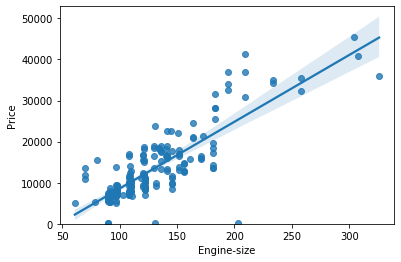

In [21]:
sns.regplot(x="Engine-size", y= "Price", data=df)
plt.ylim(0,)

In [22]:
#Grouping the data such as Body-Style and Price on the basis of Drive Wheels
df_gbp=df[["Drive-Wheels","Body-Style","Price"]]
#Group the data of the cars based on the drive wheels, body-style  and  price (mean of the price)
#df_gb=df_gbp.groupby(["Drive-Wheels","Body-Style"]).mean()
#Grouping the data in a differnt manner with index number
df_gb=df_gbp.groupby(["Drive-Wheels","Body-Style"], as_index=False).mean()
df_gb


,Drive-Wheels,Body-Style,Price
0,4wd,hatchback,3862.500000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9471.807018
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [23]:
df_pvt=df_gb.pivot(index="Drive-Wheels",columns="Body-Style")
df_pvt

Price                                            \
Body-Style   convertible       hardtop     hatchback         sedan   
Drive-Wheels                                                         
4wd                  NaN           NaN   3862.500000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9471.807018   
rwd              23949.6  24202.714286  13589.578947  21711.833333   

                            
Body-Style           wagon  
Drive-Wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

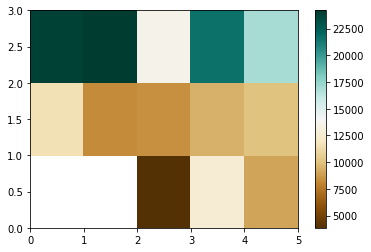

In [24]:
plt.pcolor(df_pvt,cmap='BrBG')
plt.colorbar()
plt.show()

In [25]:
df_anovatest1=df[['Make','Price']]
grp_anova1=df_anovatest1.groupby(['Make'])
grp_anova1
grp_result1=stats.f_oneway(grp_anova1.get_group("honda")["Price"],grp_anova1.get_group("jaguar")["Price"])
grp_result1

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

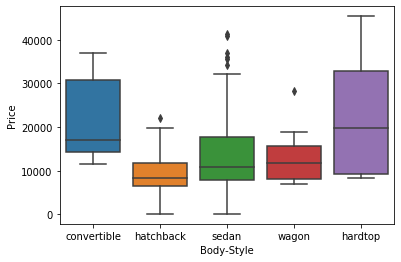

In [26]:
sns.boxplot(x="Body-Style", y="Price", data=df)


In [27]:
df.describe(include=['object'])


,Make,Fuel-type,Aspiration,No. of doors,Body-Style,Drive-Wheels,Engine-Location,Engine-type,No.of cylinders,Fuel-systems,Bore,Stroke
count,205,205,205,205,205,205,205,205,205,205,205,205
unique,22,2,2,3,5,3,2,7,7,8,39,37
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,3.62,3.40
freq,32,185,168,114,96,120,202,148,159,94,23,20


In [28]:
df['Make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

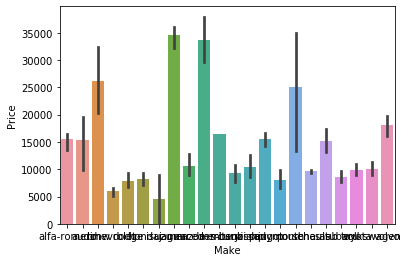

In [29]:
sns.barplot(x='Make',y='Price',data=df)

In [30]:
lm=LinearRegression()

In [70]:
x=df[['Highway-mpg']]
y=df[['Price']]
lm.fit(x,y)
yhat=lm.predict(x)
yhat[0:5]



KeyError: "None of [Index(['Highway-mpg'], dtype='object')] are in the [columns]"

In [32]:
lm.intercept_


array([37755.84667568])

In [33]:
lm.coef_

array([[-806.60335795]])

In [34]:
mlr=df[["Highway-mpg","City-mpg","Horse-power"]]
g=df[['Price']]
lm.fit(mlr,g)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
lm.coef_
lm.intercept_

array([15176.83630218])

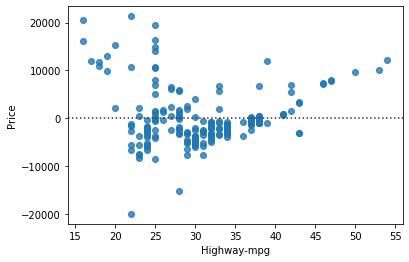

In [40]:
sns.residplot(df['Highway-mpg'], df['Price'])

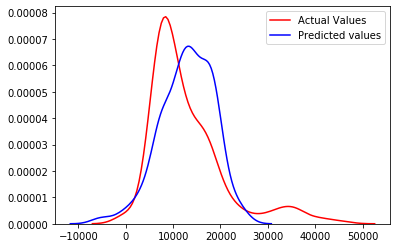

In [122]:
ax1=sns.distplot(y,hist=False, color='r',label='Actual Values')
sns.distplot(yhat, hist=False,color='b',label='Predicted values', ax=ax1)

In [41]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [54]:
Z = df[['Horse-power', 'Curb-Weight', 'Engine-size', 'Highway-mpg']]

In [55]:
Z_pr=pr.fit_transform(Z)

In [56]:
Z.shape

(205, 4)

In [57]:
Z_pr.shape

(205, 15)

In [123]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [184]:
f=np.polyfit(x,y,3)

TypeError: expected 1D vector for x